Ваше имя и фамилия: Denis Sosnovskiy

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from scipy import stats
from scipy.interpolate import interp1d
from scipy import optimize

import csv

## Задание 1. Линейная регрессия

#### Данное задание является обязательным

Наша задача - предсказать уровень преступности на душу населения, используя переменные в наборе данных Boston. Уровень преступности на душу населения будет нашим ответом, а другие переменные - предикторами.

### Бостон датасет

Датасет содержит такие данные:

-crim -- уровень преступности на душу населения по городам.

-zn -- доля земель под жилую застройку, зонированных на участки более 25 000 кв. футов.

-indus -- доля акров, не относящихся к розничной торговле, на город.

-chas -- фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае).

-nox -- концентрация оксидов азота (частей на 10 млн).

-rm -- среднее количество комнат в доме.

-age -- доля занятых владельцами участков, построенных до 1940 года.

-dis -- среднее расстояние до пяти бостонских центров занятости.

-rad -- индекс доступности радиальных магистралей.

-tax -- полная ставка налога на имущество за \ $ 10,000.

-ptratio -- соотношение учеников и учителей по городам.

-lstat -- более низкий статус населения (в процентах).

-medv -- медианная стоимость домов, занимаемых владельцами, за 1000 долларов.


Sources:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [37]:
data = pd.read_csv('Boston_dataset.csv',index_col=0)

In [38]:
data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
1   4.98  24.0  
2   9.14  21.6  
3   4.03  34.7  
4   2.94  33.4  
5   5.33  36.2

### Задание 1.1

- Для каждого предиктора подберите простую модель линейной регрессии, чтобы предсказать ответ. 
- Опишите свои результаты. 
- В какой из моделей существует статистически значимая связь между предиктором и ответом? 
- Создайте несколько графиков, подтверждающих ваши утверждения.

In [39]:
params = []
for col in data.columns:
    if col != 'crim':
        X = data[col]
        Y = data.crim
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
        print('Predictor =',col,results.summary(),'\n\n')
        print('RSE/mean =',np.sqrt((1/(len(X)-2))*np.sum((Y-results.predict())**2))/np.mean(Y)*100,'%','\n\n\n\n\n\n')
        params.append(results.params)

Predictor = zn                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.51e-06
Time:                        18:51:59   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     

Predictor = ptratio                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.94e-11
Time:                        18:52:00   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147

In [40]:
betasOneDim = [params[i][1] for i in range(12)]
betasOneDim #will be used in task 1.3


[-0.07393497740412347,
 0.5097763311042313,
 -1.8927765508037604,
 31.2485312011229,
 -2.684051224113947,
 0.10778622713953306,
 -1.5509016824100992,
 0.6179109273272012,
 0.029742252822765363,
 1.1519827870705854,
 0.5488047820623978,
 -0.36315992225760296]

We see that for almost all predictors P-value of t-statistic is zero, meaning there is a correlation (we reject the hypothesis: $\beta_j=0$). But this correlation must be not very strong due to the small R-squared values. Also RSE is too big to say about good linear approximation of the data we have.

Extremely bad correlation we have for predictor 'chas' (P = 0.2, $R^2$ = 0.003, F-stat = 1.579 and confidence interval for $\beta$ contains zero).

More or less good correlation takes place in case of 'rad', 'tax' and 'lstat' predictors ($R^2>0.2 \text{ and } F>100$). We can look at these correlations on the graphs:

In [41]:
winers = ['rad','tax','lstat']
fig = make_subplots(rows=len(winers), cols=1)
i=0
for win in winers:
    i+=1
    X = data[win]
    Y = data.crim
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    predictions = results.predict()
    fig.add_trace(go.Scatter(x=data[win],y=data.crim, mode='markers',name = win, marker=dict(color='green')),row=i, col=1)
    fig.add_trace(go.Scatter(x=data[win],y=predictions, mode='lines',name = win, marker=dict(color='blue')),row=i, col=1)
    
fig.update_layout(title_text='Linear approximation',height=2000, width=1000)
fig.show()

It doesn't look very impressive due to the specific form of distribution but we have what we have. 

By the way maybe the normalization of the data could help us to get nicer graphs (I'll not check this). But it's more looks like one predictor is not enough to get good linear model.

One remark should be made about correlations between the predictors. We see 'rad','tax' and 'lstat' demonstrate good correlation with the 'crim', but who knows if these predictors are independent, maybe there is correlation  between them. In order to check this:

In [42]:
data.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787  
lstat   -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000

The correlation between 'tax' and 'rad' is about 91%, meaning we can use only one of them.

Let's look more closely to the correlation table to make sure we chose right 'winers' among the predictors:

In [43]:
for col in data.columns:
    print('The correlation between', col, 'and crim: ', data[col].corr(data.crim))

The correlation between crim and crim:  1.0
The correlation between zn and crim:  -0.20046921966254752
The correlation between indus and crim:  0.4065834114062594
The correlation between chas and crim:  -0.055891582222241463
The correlation between nox and crim:  0.4209717113924562
The correlation between rm and crim:  -0.2192467028625139
The correlation between age and crim:  0.3527342509013639
The correlation between dis and crim:  -0.37967008695102455
The correlation between rad and crim:  0.6255051452626016
The correlation between tax and crim:  0.5827643120325849
The correlation between ptratio and crim:  0.28994557927952014
The correlation between lstat and crim:  0.45562147944794623
The correlation between medv and crim:  -0.3883046085868113


Yes 'rad', 'tax' and 'lstat' are leaders. Let's see what happens next with our choice of 'winers'.

### Задание 1.2

- Подберите модель множественной регрессии, чтобы предсказать ответ с использованием всех предикторов. 
- Опишите свои результаты. 
- Для каких предикторов мы можем отклонить основную гипотезу $H_0: \beta_j = 0$?

In [44]:
x_columns = data.columns[data.columns!='crim']

In [45]:
X = data[x_columns]
Y = data.crim
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.03e-56
Time:                        18:52:01   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

In [46]:
betasMultiDim = [results.params[i] for i in range(1,13)]
betasMultiDim #will be used in task 1.3

[0.045710038639756825,
 -0.05835011066598242,
 -0.8253775522410347,
 -9.957586547089257,
 0.6289106621782009,
 -0.0008482790661914971,
 -1.0122467382083893,
 0.6124653114967984,
 -0.0037756465234421595,
 -0.30407275723123217,
 0.13880059677676268,
 -0.22005635903920268]

P-values are zero for 'dis', 'rad' and 'medv' predictors. $R^2 \approx 0.45$, that is better value among the $R^2$ values in case of linear models with only one predictor. F-statistic shows 33.52 value, which is less than we saw before in one-dimensional models. This can mean that to use all the predictors is not the best choice we can make.

In [47]:
print('RSE/mean =',np.sqrt((1/(len(X)-2))*np.sum((Y-results.predict())**2))/np.mean(Y)*100,'%')

RSE/mean = 176.8148064093875 %


It's still very big RSE/mean value.

Let H0: $\beta_j = 0$

H1: H0 is wrong

Looking at P-values of t-statistic and choosing 5% level of significance we can reject the null-hypothesis for 'zn', 'dis', 'rad' and 'medv' predictors. By the way confidence interval for $\beta$ in case of all other predictors contains zero.

By the way we see that choice of 'winers' has changed. 

In [71]:
sigma = np.sqrt((1/(len(X)-2))*np.sum((Y-results.predict())**2))
SE = sigma/np.sqrt(np.sum((X-np.mean(X))**2))

### Задание 1.3

- Как ваши результаты из первой задачи связаны с вашими результатами из второй задачи? 
- Создайте график, отображающий коэффициенты одномерной регрессии на оси x и соответсвующие коэффициенты множественной регрессии на оси y. То есть каждый предиктор отображается как одна точка на графике. Его коэффициент в простой модели линейной регрессии показан на абсциссе, а его оценка коэффициента в модели множественной линейной регрессии показана на ординате.

The predictors that have the biggest correlation ('winers') with the 'crim' data are different in one-dimensional and multi-dimensional cases.

On the graph below we can see the correlation between $\beta$ coefficients of linear regression model in one-dimensional and multi-dimensional cases.

In [49]:
betasOneDim[0]

-0.07393497740412347

In [70]:
fig = go.Figure()
for i in range(12):
    fig.add_trace(go.Scatter(x=[betasOneDim[i]],y=[betasMultiDim[i]],name = predictor[i],mode='markers',marker_size = 5))  
x=np.arange(-5,5)
fig.add_trace(go.Scatter(x=x,y = x,mode='lines',name = 'Line Y=X'))  
fig.update_layout(title_text='MultiDim vs OneDim',height=600, width=600)
fig.show()

NameError: name 'predictor' is not defined

Only for 'rm' and 'nox' (to a greater extent for 'nox') we see the very big difference in coefficients. For other predictors we have more or less close absolute $\beta-$values unfortunately very close to zero. Some of the $\beta$ changed sign, meaning choice of the model places a really big role for the prediction.

### Задание 1.4

Есть ли доказательства нелинейной связи между какими-либо предикторами и ответом? Чтобы ответить на этот вопрос, обучите для каждого предиктора X модель до 3-ей степени, то есть $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$

In [69]:
for col in data.columns:
    if col != 'crim':
        data['col2'] = data[col]**2
        data['col3'] = data[col]**3
        x_col = [col, 'col2', 'col3']
        X = data[x_col]
        Y = data.crim
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
        print('Predictor =',col,results.summary(),'\n\n')
        print('RSE/mean =',np.sqrt((1/(len(X)-2))*np.sum((Y-results.predict())**2))/np.mean(Y)*100,'%','\n\n\n\n\n\n')        

Predictor = zn                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.28e-06
Time:                        18:54:16   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     

Predictor = dis                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           3.14e-35
Time:                        18:54:16   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0476      2.446    

Looking at the result summary one can conclude there is nonlinear correlation between the 'indus', 'nox', 'age', 'dis', 'ptratio', 'medv' predictors and 'crim'. The most apparent nonlinear correlation is for the 'medv' (P-values=0, R2 = 0.42), 'nox' (P-values=0, R2=0.297) and 'dis' (P-values=0, R2=0.28) predictors.

## Задание 2. Идентификация мошенников среди покупателей в онлайн-магазине

#### Второе задание не является обязательным. Цель этого задания - предоставить возможность решить целостную задачу, аналогичную реальным рабочим проектам и получить развернутый фидбек и советы от лектора.

#### Customers_final_ex.csv — данные о покупателях
Описание:
* Customer_id — уникальный идентификатор учетной записи клиента
* age — возраст клиентского счета в месяцах (может быть float)
* num_s — количество посылок, отправленных на адрес, по которому покупатель не проживает в течение последнего месяца
* num_dev — количество различных физических устройств (смартфонов, планшетов, ПК), связанных на данный момент с учетной записью
* gender — мужчина, женщина, другое или нет информации
* Preferred color — предпочтительный цвет заказчика

#### Transactional_info_new.csv — данные о покупках этих покупателей в последнем месяце
Описание:
* transaction_id — уникальный идентификатор покупки
* Dist — расстояние между адресом доставки и домашним адресом в км
* payment_t — тип платежа: 0 — безопасный (кредитные карты, PayPal и т. д.) 1— небезопасный (счет, рассрочка)
* count_dev_is_shop — страна, в которой находится устройство, с которого была совершена транзакция, идентифицируется по IP-адресу, идентична стране магазина (0 — да, 1 — нет)
* basket — стоимость покупки
* product_type — ценность товара в зависимости от типа товара
* Fraudulent_Trans — отметка, считалась ли транзакция мошеннической (истинное значение)
* Customer_id — идентификатор учетной записи клиента, в которой была создана эта транзакция
* Day_of_Week — день недели, когда была создана транзакция (0 - воскресенье, 1 - понедельник и тд)


#### Задание: 
* Проведите анализ полученных данных. Выберите метод анализа из изученных на курсе, обоснуйте свой выбор.
* Проанализируйте, какие факторы важны для находки покупок мошенников, какие нет? 
* Создайте модель, которая будет предсказывать на будущее Fraudulent_Trans. 
* Пришлите файл jupyter notebook с анализом и детальным описанием своей работы: какие методы вы использовали, какие теории и гипотезы вы выдвигали, как вы их проверяли и к каким результатам пришли.

In [52]:
data1 = pd.read_csv('Customers_final_ex.csv')
data2 = pd.read_csv('Transactions_final_ex.csv') #read data

fraud_trans = data2[data2.Fraudulent_trans == 1]
fraud_id = (set(fraud_trans.Customer_id)) #117 unique fraud id among the 126 fraud transactions in data2

non_fraud_trans = data2[data2.Fraudulent_trans == 0]
non_fraud_id = (set(non_fraud_trans.Customer_id)) #devide fraud from non-fraud

data1['Fraudulent_trans'] = data1.Customer_id #add new column to data1 

for cust in data1.Fraudulent_trans:
    if set([cust]).issubset(fraud_id) == True:
        data1.Fraudulent_trans = data1['Fraudulent_trans'].replace([cust],1)
    else: 
        data1.Fraudulent_trans = data1['Fraudulent_trans'].replace([cust],0) #new column shows all the frauds

In [72]:
data1

Customer_id        age  num_s  num_dev Preferred_col Gender  \
0    customer_448  35.724517      2        3          blue      f   
1    customer_183  17.396979      1        4         brown      f   
2    customer_261  37.054879      3        4         white      m   
3    customer_413  37.090268      0        2        yellow      m   
4    customer_507  47.297710      2        3        yellow      f   
..            ...        ...    ...      ...           ...    ...   
445  customer_473  40.470608      3        4          grey      m   
446  customer_309  41.429581      0        3         brown      m   
447  customer_158  46.792479      0        2          blue      f   
448   customer_37  26.292271      1        6          grey      f   
449  customer_316  31.186992      2        2         green      m   

     Fraudulent_trans  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
445                 0  
446                 0  
447                 0  
448                 0  
449                 0  

[450 rows x 7 columns]

In [ ]:
#el = 'customer_448'
#data1[data1.Customer_id==el].num_dev[0]

We have to to predict if the transaction is fraudulent or not, so we should choose predictors for that. The first idea is to use correlation method. 

In [53]:
for col in data1.columns:
    if is_numeric_dtype(data1[col]):
        print('The correlation between', col, 'and Fraudulent_trans: ', data1[col].corr(data1['Fraudulent_trans']))
print('\n')

for col in data2.columns:
    if is_numeric_dtype(data2[col]):
        print('The correlation between', col, 'and Fraudulent_trans: ', data2[col].corr(data2['Fraudulent_trans']))
    

The correlation between age and Fraudulent_trans:  0.03401570518050356
The correlation between num_s and Fraudulent_trans:  0.4180985079332968
The correlation between num_dev and Fraudulent_trans:  0.3632176834310957
The correlation between Fraudulent_trans and Fraudulent_trans:  1.0


The correlation between Dist and Fraudulent_trans:  0.32806879279344314
The correlation between payment_t and Fraudulent_trans:  0.14393593976646846
The correlation between count_dev_is_shop and Fraudulent_trans:  0.5367296342331528
The correlation between basket and Fraudulent_trans:  0.19870852028962813
The correlation between product_type and Fraudulent_trans:  -0.02885737404734276
The correlation between Day_of_week and Fraudulent_trans:  -0.04645353104692914
The correlation between Fraudulent_trans and Fraudulent_trans:  1.0


The first choice of predictors is conditioned by the correlation data. 

'Good' correlation (>10%) demostrate 'num_s', 'num_dev', 'dist', 'payment_t', 'count_dev_is_shop', 'basket' predictors.

In [74]:
print(data1.corr())
(data2.corr()) #correlations between the predictors

                       age     num_s   num_dev  Fraudulent_trans
age               1.000000  0.141980  0.131650          0.034016
num_s             0.141980  1.000000  0.469678          0.418099
num_dev           0.131650  0.469678  1.000000          0.363218
Fraudulent_trans  0.034016  0.418099  0.363218          1.000000


Dist  payment_t  count_dev_is_shop    basket  \
Dist               1.000000   0.126259           0.374888  0.243771   
payment_t          0.126259   1.000000           0.270104  0.114746   
count_dev_is_shop  0.374888   0.270104           1.000000  0.266276   
basket             0.243771   0.114746           0.266276  1.000000   
product_type       0.017312   0.013610          -0.055929 -0.029031   
Day_of_week       -0.043570   0.017954          -0.091292 -0.040081   
Fraudulent_trans   0.328069   0.143936           0.536730  0.198709   

                   product_type  Day_of_week  Fraudulent_trans  
Dist                   0.017312    -0.043570          0.328069  
payment_t              0.013610     0.017954          0.143936  
count_dev_is_shop     -0.055929    -0.091292          0.536730  
basket                -0.029031    -0.040081          0.198709  
product_type           1.000000     0.012324         -0.028857  
Day_of_week            0.012324     1.000000         -0.046454  
Fraudulent_trans      -0.028857    -0.046454          1.000000

There are some correlations between predictors, but I decide to save all of them at the moment, because it seems all the predictors contribute some unique information to our investigation.

To get more insight into correlations one can use boxplots presenting the distribution of the predictor data for both classes (fraud and non_fraud): 

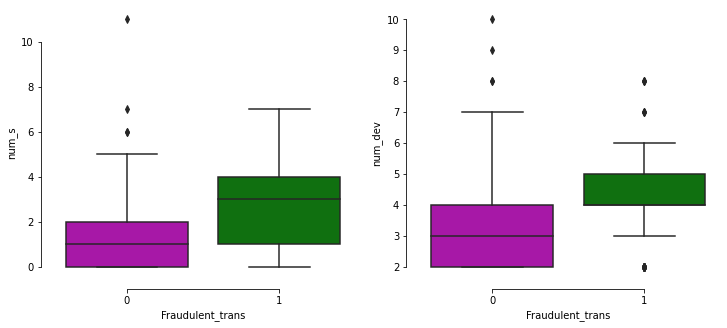

In [54]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(ax=ax[0],x="Fraudulent_trans", y="num_s",
            palette=["m", "g"],
            data=data1)
sns.boxplot(ax=ax[1],x="Fraudulent_trans", y="num_dev",
            palette=["m", "g"],
            data=data1)
sns.despine(offset=10, trim=True)

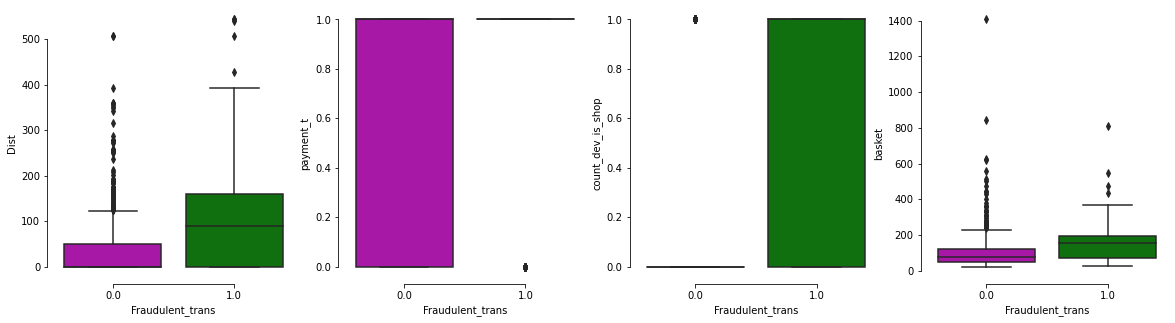

In [55]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.boxplot(ax=ax[0],x="Fraudulent_trans", y="Dist",
            palette=["m", "g"],
            data=data2)
sns.boxplot(ax=ax[1],x="Fraudulent_trans", y="payment_t",
            palette=["m", "g"],
            data=data2)
sns.boxplot(ax=ax[2],x="Fraudulent_trans", y="count_dev_is_shop",
            palette=["m", "g"],
            data=data2)
sns.boxplot(ax=ax[3],x="Fraudulent_trans", y="basket",
            palette=["m", "g"],
            data=data2)

sns.despine(offset=5, trim=True)

There is strong dependence between distribution of number of devices and fraudulent class. Moreover type of payment and country of the transaction demonstrate different behavior depending on the class. Other distribution of potential predictors have rather big intersection in both classes.

So we choose 'num_dev', 'payment_t' and 'count_dev_is_shop' to predict the 'Fraudulent_trans' using logistic regression. The choice of the method is conditioned by the variable we wanna predict - it's binary variable (True/False, 1/0), thus logistic regression is more suitable for the problem we have.

In [56]:
from sklearn.linear_model import LogisticRegression

<AxesSubplot:xlabel='num_dev', ylabel='Fraudulent_trans'>

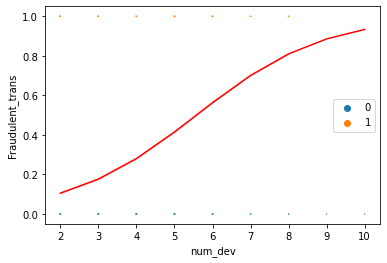

In [57]:
X = data1[['num_dev']]
y = data1['Fraudulent_trans']
clf = LogisticRegression(random_state=0).fit(X, y)
p = clf.predict_proba(X)# probabilities
clas = clf.predict(X) # classes
sns.scatterplot(x=data1['num_dev'],y=data1['Fraudulent_trans'],hue=data1['Fraudulent_trans'],s=2)
sns.lineplot(x=data1['num_dev'],y=p[:,1],estimator='mean',color='red')

Let's evaluate the metrics and quialuty of learning.

In [58]:
from sklearn.metrics import plot_confusion_matrix # confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split # автоматическое разделение данных на 80/20
from sklearn.model_selection import cross_validate # перекрестная проверка

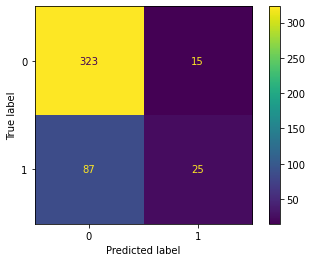

In [59]:
plot_confusion_matrix(clf,X,y)

In [60]:
print('Accuracy = ', accuracy_score(y.astype(int),clas)) #(tp+tn)/(tp+tn+fp+fn)
print('Precision = ', precision_score(y.astype(int),clas)) #(tp)/(tp+fp), relevant instances among the retrieved
print('Recall = ', recall_score(y.astype(int),clas) ) #(tp)/(tp+fn), retrieved among the relevant

Accuracy =  0.7733333333333333
Precision =  0.625
Recall =  0.22321428571428573


Only 22% among the all frauds we predict correctly. 

But that is about the data we were trained on. We should devide our data into training and testing samples.

0.24166666666666667
0.2777777777777778


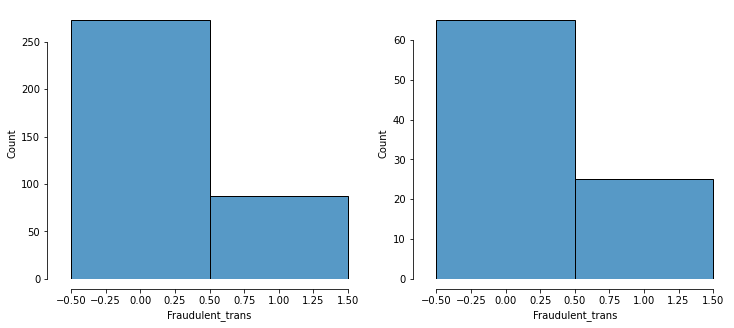

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(y_train,ax=ax[0],discrete=True,label='False')
sns.histplot(y_test,ax=ax[1],discrete=True)
sns.despine(offset=10, trim=True)

print(len(y_train[y_train==1])/len(y_train))
print(len(y_test[y_test==1])/len(y_test))    #the same proportion

In [62]:
new_model= LogisticRegression(random_state=0).fit(X_train, y_train)
results_train = new_model.predict(X_train)
results_test = new_model.predict(X_test)

print('Training data results:')
print('Accuracy = ', accuracy_score(y_train, results_train)) #(tp+tn)/(tp+tn+fp+fn)
print('Precision = ', precision_score(y_train, results_train)) #(tp)/(tp+fp), relevant instances among the retrieved
print('Recall = ', recall_score(y_train, results_train) ) #(tp)/(tp+fn), retrieved among the relevant
print('\n')
print('Testing data results:')
print('Accuracy = ', accuracy_score(y_test,results_test)) #(tp+tn)/(tp+tn+fp+fn)
print('Precision = ', precision_score(y_test,results_test)) #(tp)/(tp+fp), relevant instances among the retrieved
print('Recall = ', recall_score(y_test,results_test) ) #(tp)/(tp+fn), retrieved among the relevant

Training data results:
Accuracy =  0.7638888888888888
Precision =  0.5333333333333333
Recall =  0.1839080459770115


Testing data results:
Accuracy =  0.8111111111111111
Precision =  0.9
Recall =  0.36


We expect Accuracy about 70% and recall about 20%.

The same procedure can be done for 'payment_t' and 'count_dev_is_shop' predictors. I'll do it a little bit shorter:

0.13375
0.095


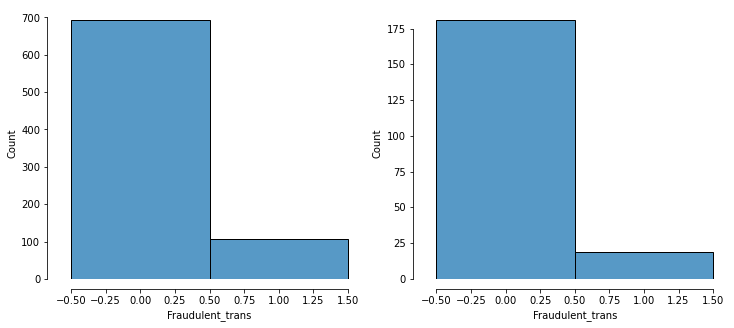

In [63]:
X = data2[['payment_t','count_dev_is_shop']]
y = data2['Fraudulent_trans']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(y_train,ax=ax[0],discrete=True,label='False')
sns.histplot(y_test,ax=ax[1],discrete=True)
sns.despine(offset=10, trim=True)

print(len(y_train[y_train==1])/len(y_train))
print(len(y_test[y_test==1])/len(y_test))    #the same proportion

In [64]:
new_model= LogisticRegression(random_state=0).fit(X_train, y_train)
results_train = new_model.predict(X_train)
results_test = new_model.predict(X_test)

print('Training data results:')
print('Accuracy = ', accuracy_score(y_train, results_train)) #(tp+tn)/(tp+tn+fp+fn)
print('Precision = ', precision_score(y_train, results_train)) #(tp)/(tp+fp), relevant instances among the retrieved
print('Recall = ', recall_score(y_train, results_train) ) #(tp)/(tp+fn), retrieved among the relevant
print('\n')
print('Testing data results:')
print('Accuracy = ', accuracy_score(y_test,results_test)) #(tp+tn)/(tp+tn+fp+fn)
print('Precision = ', precision_score(y_test,results_test)) #(tp)/(tp+fp), relevant instances among the retrieved
print('Recall = ', recall_score(y_test,results_test) ) #(tp)/(tp+fn), retrieved among the relevant

Training data results:
Accuracy =  0.90375
Precision =  0.65625
Recall =  0.5887850467289719


Testing data results:
Accuracy =  0.885
Precision =  0.4166666666666667
Recall =  0.5263157894736842


Very good metrics! The model works, we can estimate the probability to find fraud if we have the statistics of the payment type and country of the transaction.

<AxesSubplot:xlabel='payment_t', ylabel='Fraudulent_trans'>

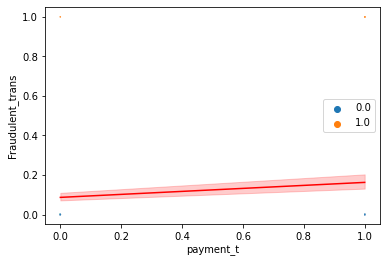

In [65]:
p = new_model.predict_proba(X_test)# probabilities
sns.scatterplot(x=X_test['payment_t'],y=y_test,hue=data2['Fraudulent_trans'],s=2)
sns.lineplot(x=X_test['payment_t'],y=p[:,1],estimator='mean',color='red')

<AxesSubplot:xlabel='count_dev_is_shop', ylabel='Fraudulent_trans'>

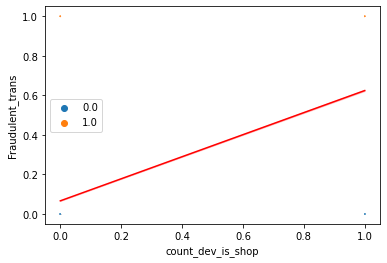

In [66]:
sns.scatterplot(x=X_test['count_dev_is_shop'],y=y_test,hue=data2['Fraudulent_trans'],s=2)
sns.lineplot(x=X_test['count_dev_is_shop'],y=p[:,1],estimator='mean',color='red')

Besides logistic regression analysis we can speculate a bit about quantative data. For example is there correlation between the 'sex' and 'fraudulent_trans'. The simplest thing we can do is to construct 99% confidence interval for proportion of women among the frauds.  

In [67]:
print('Number of male fraud =', len(data1[(data1.Fraudulent_trans==1) & (data1.Gender=='m')]))
print('Number of female fraud =', len(data1[(data1.Fraudulent_trans==1) & (data1.Gender=='f')]))

Number of male fraud = 31
Number of female fraud = 59


In [68]:
#one can simulate sample corresponding our proportions
sample = np.concatenate(((np.zeros(59)+1),np.zeros(31)),axis=0) # 0 - male, 1 - female

mean=sample.mean()
err = np.std(sample,ddof=1)/np.sqrt(90)
z = stats.norm.ppf(0.995)
print('Mean (female_proportion) =', mean)
print('Our 99% confidence interval =', '[', mean-z*err, ',', mean+z*err,']')

Mean (female_proportion) = 0.6555555555555556
Our 99% confidence interval = [ 0.5258118135284986 , 0.7852992975826125 ]


I hope no one accuse me of sexism but it really looks like the interval doesn't match 0.5. But this observation can be absolutely random and depend on the sample size. 

Analogously we can discuss correlation between 'color' and 'fraudulent_trans', but unfortunately I do this final homework one day before deadline, so I dont'have enough time and energy to finish this work completely.